<a href="https://colab.research.google.com/github/sooyeon114/PCA_life_expectancy/blob/main/life_expctancy_Soo_Yeon_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final week assignment
It was my first time learning data analysis with Python, and I had no idea what kind of analysis Python could do and what data was suitable. From the first class, I was impressed to learn to make different charts from the former presidents' information, and I wanted to have something like that. It was funny and gave some insights. I wished I could make a result like that. I tried to analytic insights about American debt in different states.

First, I needed to set up the libralies and clean up the data.

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/data/Jan2024.csv')
del df['state_name']

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from scipy.cluster import hierarchy
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

In [42]:
def fix_col(col):
  return col.replace(' ', '_').rstrip('.').lstrip('/').lower()

def name(df):
  return (df
   .rename(columns=fix_col))

df2 = name(df)
df3 = df2.set_index('state')
df3

,share_with_any_debt_in_collections,share_with_medical_debt_in_collections,average_household_income,lifeexpectancy,male,female
state,,,,,,
AL,0.337288,0.164056,71478,73.2,70.1,76.4
AK,0.167243,0.038780,98504,76.6,74.3,79.2
AZ,0.266694,0.124015,84438,76.3,73.4,79.5
AR,0.346579,0.177830,68219,73.8,71.1,76.6
CA,0.208771,0.077583,113563,79.0,76.2,82.0
CO,0.213803,0.109629,103518,78.3,75.8,80.9
CT,0.219471,0.095203,114630,78.4,75.6,81.3
DE,0.286683,0.162604,92445,76.7,73.9,79.5
DC,0.223291,0.060608,135369,75.3,71.7,78.7


Once the basic settings were done, I made a bar chart to see the life expactancy from the lowest state to the highest.

<Axes: ylabel='state'>

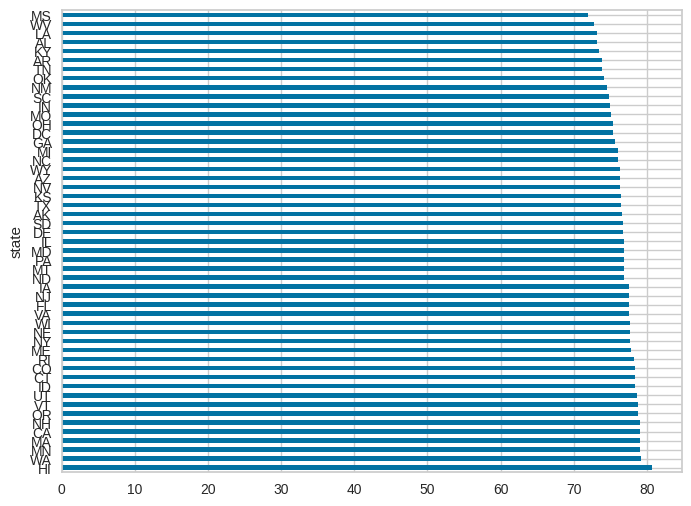

In [43]:
(df3
['lifeexpectancy']
.sort_values(ascending=False)
.plot(kind='barh',figsize=(8,6))
)

I also made a histogram to see average household income.

<Axes: >

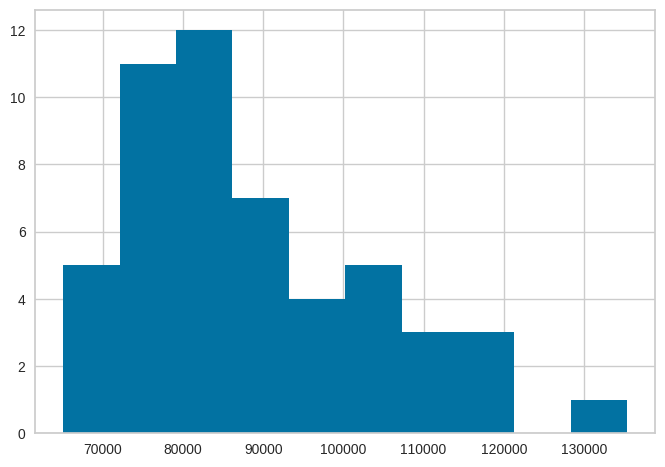

In [44]:
df3.average_household_income.hist()

𝛩 result shows that most of the states have income between 75000~85000.

Then, I wanted to see the relationship between the average income and life expectancy.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Axes: xlabel='average_household_income', ylabel='lifeexpectancy'>

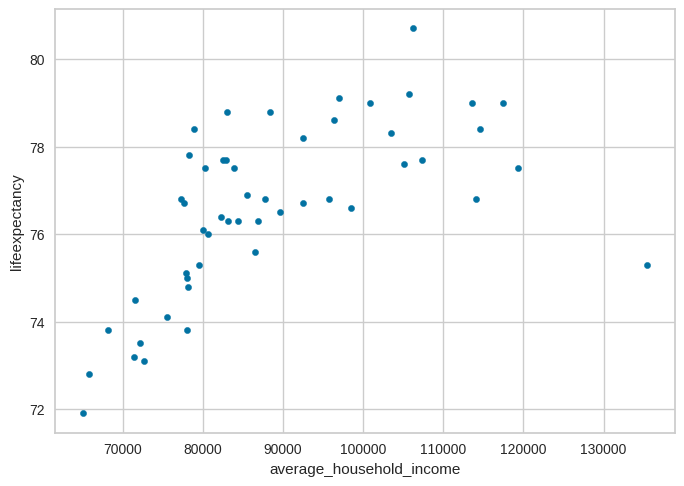

In [45]:
df3.plot.scatter(x='average_household_income', y='lifeexpectancy')

I expected a linear relationship between income and debt, and the result showed correlation.

I also tried PCA.

In [46]:
def tweak_kag2(df):
    df = pd.get_dummies(df, drop_first=True)
    cols = [c.replace(' ', '_') for c in df.columns]
    df.columns = cols
    return df
df = tweak_kag2(df3)
df

,share_with_any_debt_in_collections,share_with_medical_debt_in_collections,average_household_income,lifeexpectancy,male,female
state,,,,,,
AL,0.337288,0.164056,71478,73.2,70.1,76.4
AK,0.167243,0.038780,98504,76.6,74.3,79.2
AZ,0.266694,0.124015,84438,76.3,73.4,79.5
AR,0.346579,0.177830,68219,73.8,71.1,76.6
CA,0.208771,0.077583,113563,79.0,76.2,82.0
CO,0.213803,0.109629,103518,78.3,75.8,80.9
CT,0.219471,0.095203,114630,78.4,75.6,81.3
DE,0.286683,0.162604,92445,76.7,73.9,79.5
DC,0.223291,0.060608,135369,75.3,71.7,78.7


In [59]:
X = df
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)

X_std

,share_with_any_debt_in_collections,share_with_medical_debt_in_collections,average_household_income,lifeexpectancy,male,female
0,1.248344,0.757978,-1.131679,-1.753273,-1.773421,-1.712991
1,-1.172076,-1.493430,0.630484,0.003039,0.216452,-0.129722
2,0.243506,0.038376,-0.286654,-0.151930,-0.209949,0.039914
3,1.380595,1.005507,-1.344174,-1.443336,-1.299642,-1.599900
4,-0.580962,-0.796075,1.612368,1.242788,1.116633,1.453548
5,-0.509340,-0.220164,0.957409,0.881194,0.927121,0.831549
6,-0.428665,-0.479413,1.681939,0.932851,0.832365,1.057730
7,0.528030,0.731874,0.235422,0.054695,0.026940,0.039914
8,-0.374291,-1.101148,3.034174,-0.668492,-1.015374,-0.412448
9,0.566457,0.391613,-0.322842,0.467945,0.358586,0.605368


In [60]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(6)])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.463677,-0.059097,0.732427,-0.172856,-0.005849,0.000509
1,-1.314400,0.062072,1.503339,0.126027,-0.235667,0.048381
2,0.348397,-0.144506,-0.034344,-0.222179,0.128703,0.048197
3,3.293778,-0.313474,0.176534,-0.144457,-0.237866,0.002254
4,-2.733880,0.865665,-0.437760,-0.226044,0.082692,0.046166
5,-1.755978,0.437274,-0.495914,0.167313,-0.058432,0.007664
6,-2.136949,1.107081,-0.359236,-0.028950,0.043195,0.020304
7,0.378299,0.435505,-0.732791,0.071885,-0.003812,-0.015825
8,-0.648905,2.864870,1.881046,0.093375,0.172960,-0.035794
9,-0.131531,-0.237574,-1.025757,-0.400603,0.076728,0.014033


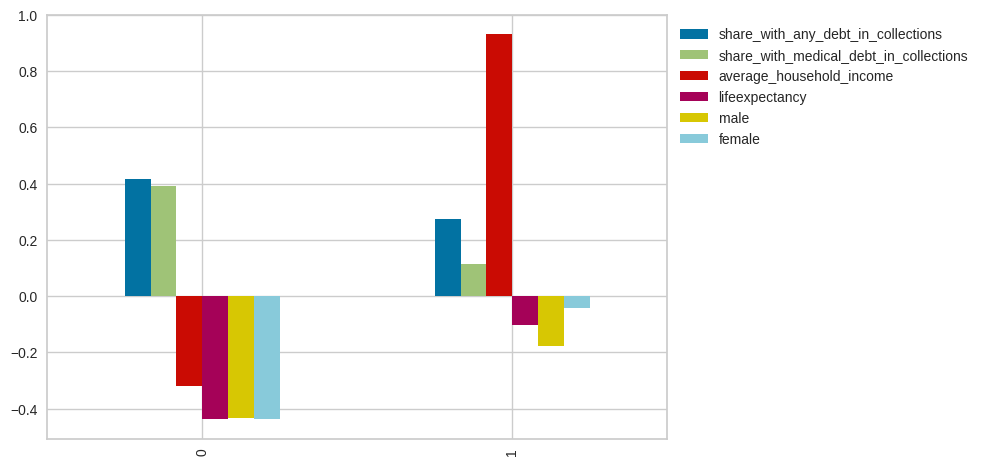

In [61]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

Surprisingly, medical debt had a high negative effect. According to the graph, people with a high share of medical debt among their debt are likely to have less percentage of debt to equity ratio.

I also tried plot with seaborn. It would have been more interesting if I had debt per capita data and used it as a X,Y, and hue. The result shows that PC1 has strong influence.

<Axes: xlabel='PC1', ylabel='PC2'>

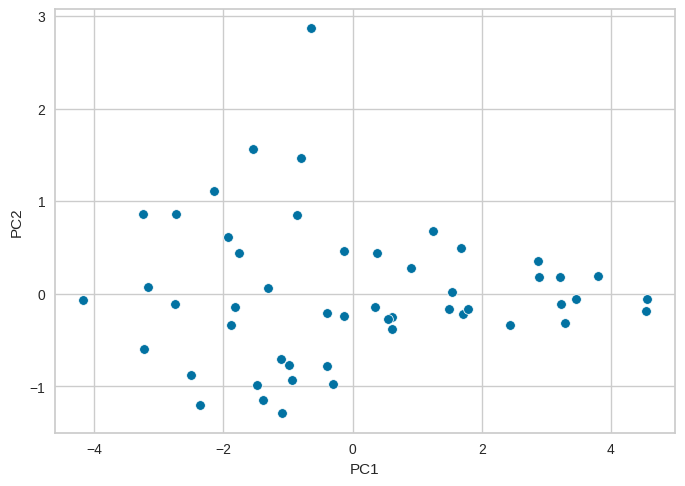

In [69]:
sns.scatterplot(x='PC1', y='PC2',
                data=pca_X.assign(share_with_medical_debt_in_collections=df.share_with_medical_debt_in_collections),
                hue='share_with_medical_debt_in_collections')

cluster

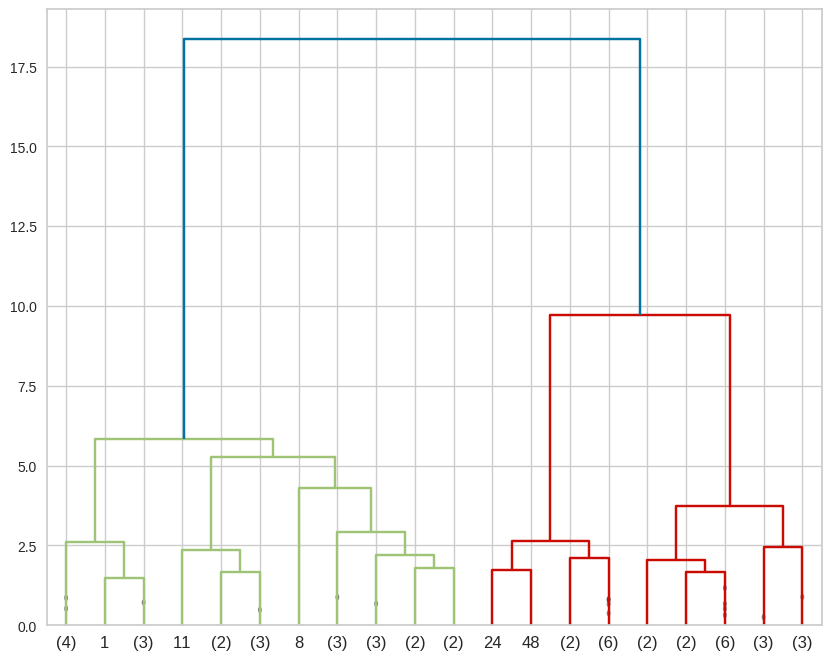

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                    truncate_mode='lastp', p=20, show_contracted=True)
pass

## conclusion

I was able to understand the de
I realized in the middle of the coursework that my data did not exactly have the information I wanted to analyze. My ideal raw data would be each state's total number of debts, mortgages, student loans, auto loans, and credit card loans. However, my data was about the share, so that I couldn't compare the size of debts in different states.
I failed to make the results that I was expecting initially, but I had a great time learning about collab and Python.